# Redes Neuronales SOM (Self Organizing Maps)

Fueron inventadas en la década de los 90 por **Teuvo Kohonen**, y también son conocidos como los **Mapas de Kohonen**, porque él fue la primera persona en introducir este concepto. Se usan para reducción dimensional, este algoritmo igual es utilizado en astronomía, y es una aplicación bastante interesante.

La mejor representación de este tipo de red, es la siguiente, toman una entrada multidimensional, de un dataset de miles de columnas, es decir miles de dimensiones, y miles de filas, y reducen la dimensionalidad de ese dataset, de todas esas columnas, terminan un mapa de 2 dimensiones, que contiene la representación, de todo el dataset.

El punto de los SOMs es reducir la cantidad de columnas, este es la base detrás de este algoritmo.

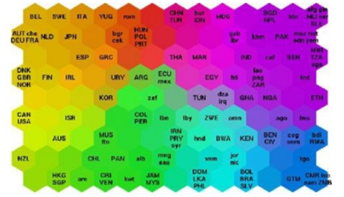

Así es como se ve un SOM, estos son países del mundo y este algoritmo los puso en clústeres, diferentes de acuerdo a muchos indicadores, en este ejemplo son 39 columnas, que describen cosas como la calidad de vida, la calidad de la salud, educación y nutrición entre otras, en la esquina izquierda superior, están los países con una calidad de vida muy alta, mientras que, en la esquina derecha inferior, están los países con calidad de vida muy pobre.
El objetivo de este en primer lugar de manera no supervisada, es decir, solo con nuestros datos de entrada, podemos tener un gráfico que represente de una manera muy precisa nuestro dataset de N dimensiones, en solo dos dimensiones, algo muy importante a notar, es que este algoritmo aprende solo, se le pasan datos de entrada, pero no se le pasan datos de salida, el algoritmo aprende las similaridades de forma autónoma, las similaridades entre los datos que conforman el dataset.


# Cómo aprenden las SOM?

Anteriormente, se vió un poco de cómo funcionan los SOM, pero ahora, como aprende un algoritmo SOM, recordemos que solo le pasamos los datos de entrada, no los de salida, ahora se explicará cómo es que este algoritmo funciona, para eso, veamos cómo se ve.

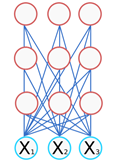

Así es como se ve una Red Neuronal SOM, tenemos 3 valores en nuestro vector de entrada y 9 neuronas, se dijo anteriormente, que este algoritmo servía para reducir las dimensiones de los datos, y ¿como puede ser esto posible?, porque las neuronas son la salida, entonces como si tenemos 3 valores de entrada, tenemos 9 salidas, no nos dejemos llevar por esta representación, en verdad nuestra entrada tendrá más dimensiones, mientras que la salida solo tendrá 2.
Los pasos del algoritmo son:
1.	Se inicializan los pesos de cada nodo.
2.	Se elige un vector al azar del conjunto de datos de entrenamiento.
3.	Se examina cada nodo para calcular cuál de los pesos se parece más al vector de entrada. El nodo ganador se conoce comúnmente como la mejor unidad de coincidencia (BMU).
4.	Luego se calcula la vecindad de la UMB. La cantidad de vecinos disminuye con el tiempo.
5.	El peso ganador se recompensa con parecerse más al vector de muestra. Los vecinos también se parecen más al vector de muestra. Cuanto más cerca está un nodo de la BMU, más se alteran sus pesos y cuanto más lejos está el vecino de la BMU, menos aprende.
6.	Repita el paso 2 para N iteraciones.

**Ejercicio redes neuronales SOM en Python **

Para este ejemplo utilizamos Spyder, el cual es un IDE (Entorno Integrado de Desarrollo) especializado en análisis de datos. Es necesario instalar el módulo MiniSom, que contiene las herramientas básicas para aplicar el Self-Organizing Maps (SOM). 


In [ ]:
!pip install minisom
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

  Created wheel for minisom: filename=MiniSom-2.2.9-py3-none-any.whl size=8594 sha256=818f1e2bdcaad51452ceacb7bb9c70bafdbac193f54732a7d055278a221de034
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built minisom


In [ ]:
data = np.genfromtxt('iris.csv', delimiter=',', usecols=(0, 1, 2, 3))
#Elimine los encabezados de la data
# data normalization
data = np.apply_along_axis(lambda x: x/np.linalg.norm(x), 1, data)
# Initialization and training
som = MiniSom(7, 7, 4, sigma=1.0, learning_rate=0.5)
som.random_weights_init(data)
print("Training...")
som.train_random(data, 100)  # random training
print("\n...ready!")
data.shape

Training...

...ready!


(150, 4)

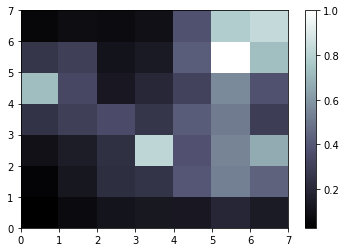

In [ ]:
# Plotting the response for each pattern in the iris dataset
plt.bone()
plt.pcolor(som.distance_map().T)  # plotting the distance map as background
plt.colorbar()

In [ ]:
target = np.genfromtxt('iris.csv', delimiter=',', usecols=(5), dtype=str)
t = np.zeros(len(target), dtype=int)
t[target == 'Iris-setosa'] = 0
t[target == 'Iris-versicolor'] = 1
t[target == 'Iris-virginica'] = 2
t

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

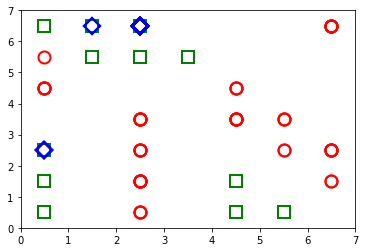

In [ ]:
# use different colors and markers for each label
markers = ['o', 's', 'D']
colors = ['r', 'g', 'b'] # (red,iris-setosa),(green,iris-versicolor),(blue,iris-virginica)
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[t[cnt]], markerfacecolor='None',
             markeredgecolor=colors[t[cnt]], markersize=12, markeredgewidth=2)
plt.axis([0, 7, 0, 7])
colors = ('red' , 'green', 'blue')
plt.show()